In [8]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 50 # number of weights
verbose = True
dev = 'cpu'

data = torch.randn(10000).to(dev)
#l = [min(data).item(), max(data).item()]
w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1).to(dev)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(-4, 4, N, requires_grad=False).to(dev)
# if l is min & max only
#index = [round((y.item() - l[0]) * (N - 1) / (l[1] - l[0])) for y in data]
# if l is all locations
index = torch.argmin(abs(l-data.view(-1,1)), dim=1)
def NLLLoss(m:list[pm.Measure]):
    mask = torch.zeros(len(m[0].weights), dtype=torch.bool)
    mask[m[0].support()] = 1
    return -m[0].weights[index].log().sum()  # [mask[index]]

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])


Epoch: 0          Loss: 39120      LR: [0.0001]
Epoch: 1          Loss: 39117      LR: [0.0001]
Epoch: 2          Loss: 39113      LR: [0.0001]
Epoch: 3          Loss: 39110      LR: [0.0001]
Epoch: 4          Loss: 39107      LR: [0.0001]
Epoch: 5          Loss: 39103      LR: [0.0001]
Epoch: 6          Loss: 39100      LR: [0.0001]
Epoch: 7          Loss: 39097      LR: [0.0001]
Epoch: 8          Loss: 39094      LR: [0.0001]
Epoch: 9          Loss: 39090      LR: [0.0001]
Epoch: 10         Loss: 39087      LR: [0.0001]
Epoch: 11         Loss: 39084      LR: [0.0001]
Epoch: 12         Loss: 39081      LR: [0.0001]
Epoch: 13         Loss: 39077      LR: [0.0001]
Epoch: 14         Loss: 39074      LR: [0.0001]
Epoch: 15         Loss: 39071      LR: [0.0001]
Epoch: 16         Loss: 39068      LR: [0.0001]
Epoch: 17         Loss: 39064      LR: [0.0001]
Epoch: 18         Loss: 39061      LR: [0.0001]
Epoch: 19         Loss: 39058      LR: [0.0001]
Epoch: 20         Loss: 39055      LR: [

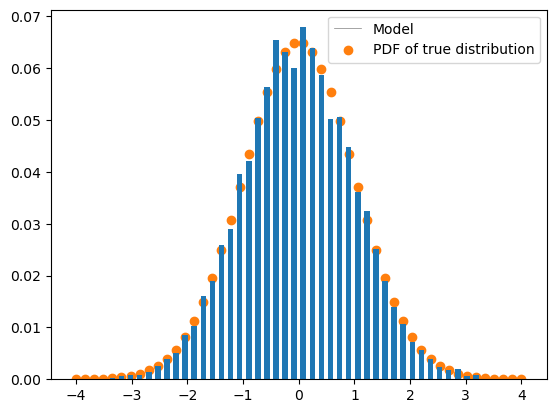

In [9]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-4)
opt.minimize(NLLLoss, verbose=True, print_freq=1)

mu=0 #Create true values
sigma=1
x = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(x-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize

measure.visualize()
plt.scatter(x, y, zorder=0)
plt.legend(['Model','PDF of true distribution'])
plt.show()
